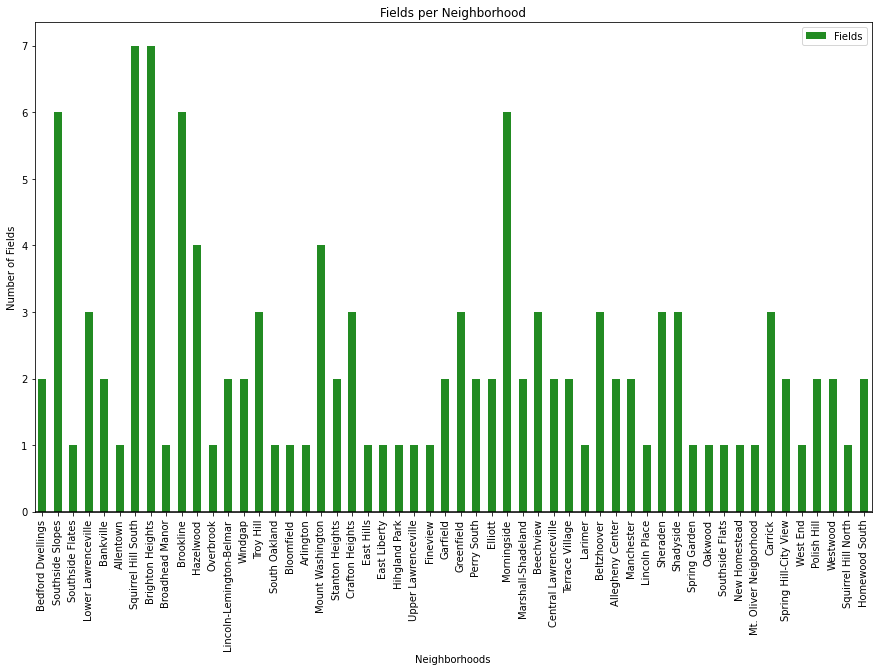

In [16]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
nlist = dict()
fields = pd.read_csv("fields.csv")
for index, row in fields.iterrows():
    place = row['Neighborhood']
    if place in nlist:
        nlist[place] = nlist[place]+1  
    if place not in nlist:
        nlist[place] = 1
neighborhoods = list(nlist.keys())
fields = list(nlist.values())
dataset = pd.DataFrame({'Neighborhood': neighborhoods,
                        'Fields': fields})

dataset.plot.bar(x='Neighborhood', y='Fields', rot=0, color= 'forestgreen', figsize=(15, 9))
plt.title("Fields per Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Fields")
plt.xticks(rotation=90)
plt.axhline(0, color='k')

In [18]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
nlist = dict()
sum=0
fields = pd.read_csv("fields.csv")
for index, row in fields.iterrows():
    place = row['Neighborhood']
    backstop = row ['Back Stop']
    if place in nlist and backstop != 1:
        nlist[place] = nlist[place]+1
        sum+=1
    if place not in nlist and backstop != 1:
        nlist[place] = 1
        sum+=1
print(sum)
print(nlist)

4
{'Allentown': 1, 'Manchester': 1, 'Squirrel Hill South': 1, 'Southside Slopes': 1}


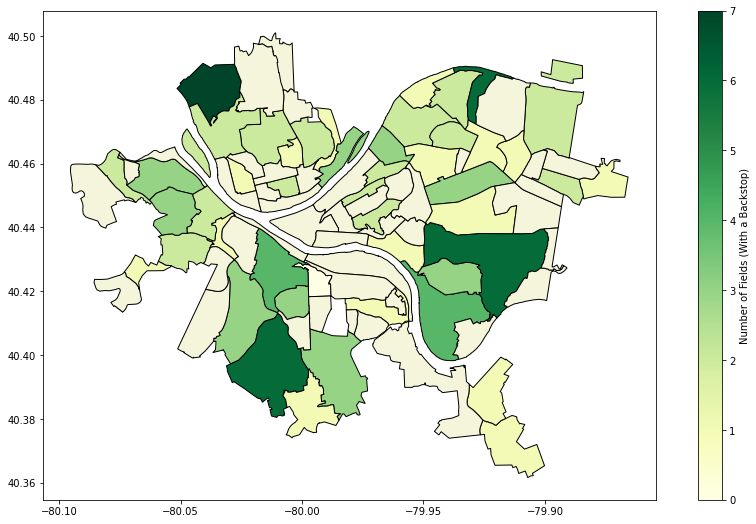

In [5]:
import pandas as pd
import geopandas
%matplotlib inline
fields = pd.read_csv("fields.csv")
num_fields = fields.groupby("Neighborhood").sum()['Back Stop']
num_fields.sort_values(ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
fields_map = neighborhoods.merge(num_fields, how='left', left_on='hood', right_on='Neighborhood')
fields_map[['hood','Back Stop','geometry']].head()
fields_map.plot(column='Back Stop',
               cmap='YlGn',
               edgecolor="black",       
               legend=True,
               legend_kwds={'label': "Number of Fields (With a Backstop)"},
               figsize=(15, 9),       
               missing_kwds={"color": "beige"} 
               )

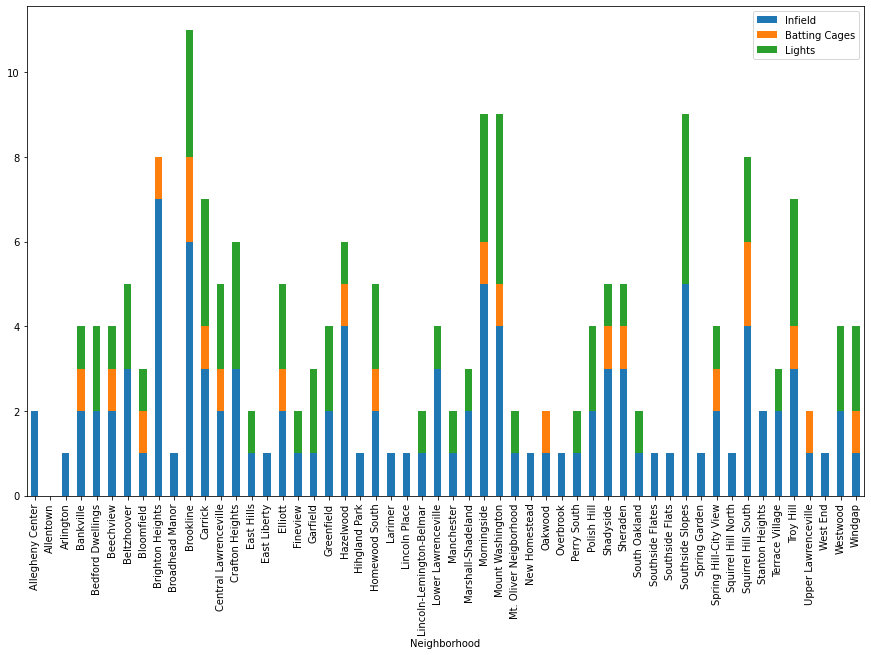

In [9]:
import pandas as pd
import geopandas
%matplotlib inline
fields = pd.read_csv("fields.csv")
infield= fields.groupby("Neighborhood").sum()['Infield']
infield.sort_values(ascending=False)
battingcages= fields.groupby("Neighborhood").sum()['Battting Cage']#batting cage is misspelled in the data set
battingcages.sort_values(ascending=False)
lights= fields.groupby("Neighborhood").sum()['Lights']
lights.sort_values(ascending=False)


dataset = pd.DataFrame({'Infield': infield,
                        'Batting Cages': battingcages,
                        'Lights':lights})


dataset.plot.bar(stacked=True, figsize=(15,9))